# <font color="Green">Student performance Indicator</font>

Life cycle of Machine Learning Project
* Understanding the Problem Stament
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre Processing
* Model Training
* Choose Best Model

## <font color="Green">1. Understanding The Problem</font>

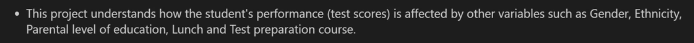

## <font color="Green">2. Data Collection</font>

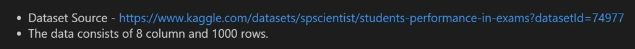

[Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

### *<font color="Green">2.1. Import Data and Required Packages</font>*

Importing Numpy, Pandas, Matplotlib, Seaborn and Warnings Library

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [62]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
df.shape

(1000, 8)

### *<font color="Green">2.2. Show information about dataset</font>*

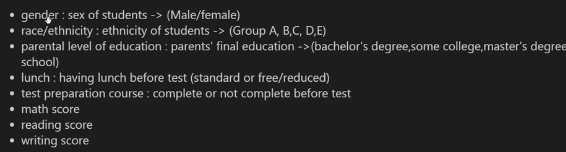

## <font color="Green">3. Data Check to Perform</font>

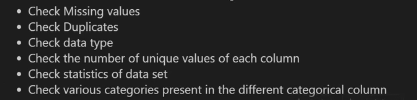

### *<font color="Green">3.1. Check missing values</font>*

In [64]:
df_nan = df.isnull().sum().to_frame()
porcentaje_nan = round((df.isnull().sum()/df.shape[0])*100,2).to_frame()
df_nan.rename({0:'count'}, axis=1,inplace=True)
porcentaje_nan.rename({0:'% nan'}, axis=1,inplace=True)
pd.concat([df_nan,porcentaje_nan],axis=1)

,count,% nan
gender,0,0.0
race/ethnicity,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0


* There are not missing values in any columns

### *<font color="Green" >3.2. Check duplicates</font>*

In [65]:
df.duplicated().sum()

0

* The are not any duplicated values

### *<font color="Green">3.3. Check data type</font>*

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### *<font color="Green">3.4. Check the number of uniques values of each column</font>*

In [67]:
# Verificar si existen datos inconsistentes o poco relevantes
for col_name in df.columns:
    print('='*50)
    print(f'{col_name}: ', df[f'{col_name}'].unique(),'\n')

gender:  ['female' 'male'] 

race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch:  ['standard' 'free/reduced'] 

test preparation course:  ['none' 'completed'] 

math score:  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading score:  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40] 

writing score: 

### *<font color="Green">3.5. Check stadistics of dataset</font>*

In [68]:
# Numéricos
df.describe(exclude=[object])

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight:
* About numeric data, all means are close to each other
* All standar deviation are also close to each other, between 15.15 - 15.2
* The minimum score is 0 in mathematics 
* The max score in all courses are 100
* 50% of students are over the mean score

### *<font color="Green">3.6. Check various categories presents in the different categorical column</font>*

In [69]:
# Categóricos
df.describe(include=[object])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Insight:
* There are more female students than male students
* More than 1/4 of people belong to group C
* More than 60% of students have a standard lunch
* Less than 40% took a test preparation course

### *<font color="Green">3.7. Exploring Data</font>*

In [70]:
category_columns = df.select_dtypes(include=[object]).columns
for col in category_columns:
    print(f"Categories in '{col}':")
    print(df[f'{col}'].unique(),'\n')

Categories in 'gender':
['female' 'male'] 

Categories in 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch':
['standard' 'free/reduced'] 

Categories in 'test preparation course':
['none' 'completed'] 



In [71]:
# define numerical and categorical features
numeric_features = list(df.select_dtypes(exclude=[object]).columns)
categorical_features = list(df.select_dtypes(include=[object]).columns)

print(f"There are {len(numeric_features)} numerical features: {numeric_features}")
print(f"There are {len(categorical_features)} categorical features: {categorical_features}")

There are 3 numerical features: ['math score', 'reading score', 'writing score']
There are 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### *<font color="Green">3.8. Adding columns for 'Total Score' and 'Average' between 3 courses</font>*

In [72]:
df["total_scores"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total_scores"]/3
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_scores,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [73]:
# Count number of students with full marks in different subjects
reading_full = df[df["reading score"] == 100]["average"].count() # retrieve all students with max "reading score" and count values in "average" column
writing_full = df[df["writing score"] == 100]["average"].count() # count all students with max "writing score" and count values in "average" column
math_full = df[df["math score"] == 100]["average"].count() # count all students with max "writing score" and count values in "average" column

print(f"number of students with full marks in Math: {math_full}")
print(f"number of students with full marks in writing: {writing_full}")
print(f"number of students with full marks in reading: {reading_full}")

number of students with full marks in Math: 7
number of students with full marks in writing: 14
number of students with full marks in reading: 17


In [74]:
# Count number of students with less than 20 marks in different subjects
reading_less_20 = df[df["reading score"] <= 20]["average"].count() 
writing_less_20 = df[df["writing score"] <= 20]["average"].count() 
math_fless_20 = df[df["math score"] <= 20]["average"].count() 

print(f"number of students with less than 20 marks in Math: {math_fless_20}")
print(f"number of students with less than 20 marks in writing: {writing_less_20}")
print(f"number of students with less than 20 marks in reading: {reading_less_20}")

number of students with less than 20 marks in Math: 4
number of students with less than 20 marks in writing: 3
number of students with less than 20 marks in reading: 1


Insights:
* From above values, students have performed the worst in Math
* More students have performed better in reading

## <font color="Green">4. Exploring Data - Visualization</font>

### *<font color="Green">4.1. Visualize average score distribution to make some conclusion</font>*

* Histogram
* Kernel Distribution Funtion (KDE)

#### *<font color="Green">4.1.1. Histogram and KDE</font>*

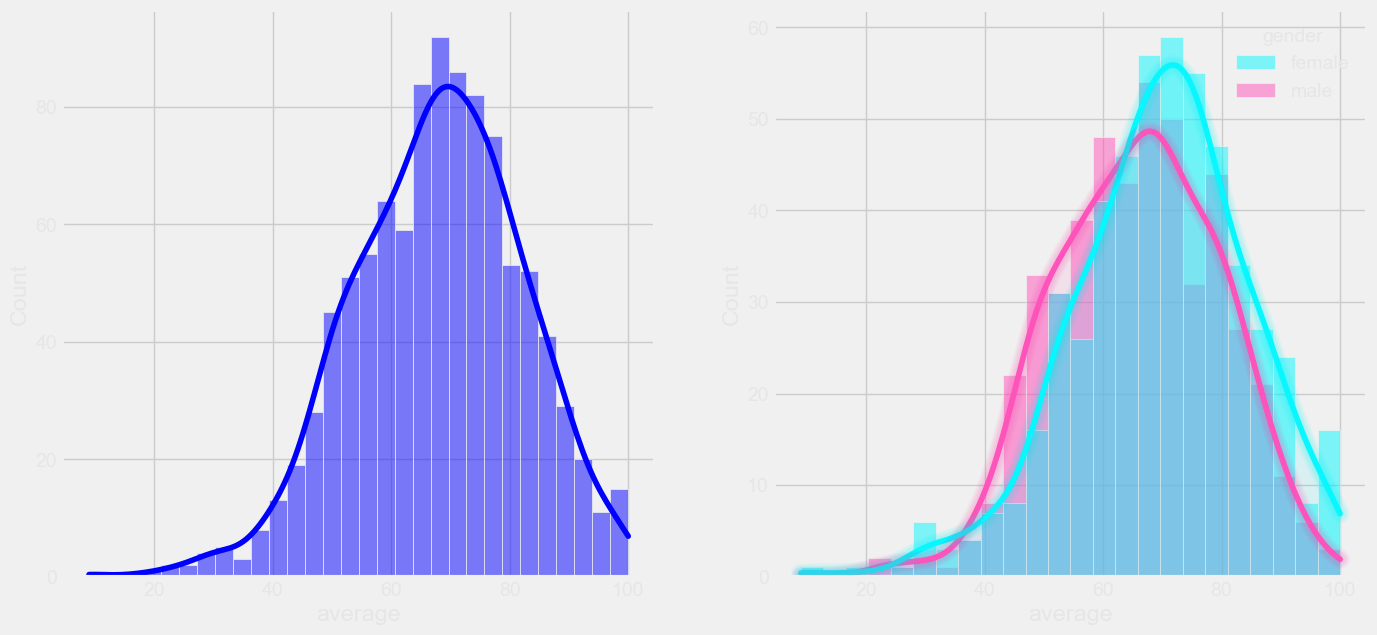

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.style.use("cyberpunk")
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde=True, hue='gender')
mplcyberpunk.add_glow_effects()
plt.show()


Insight:
* There are more women than men students that have obtained better scores.

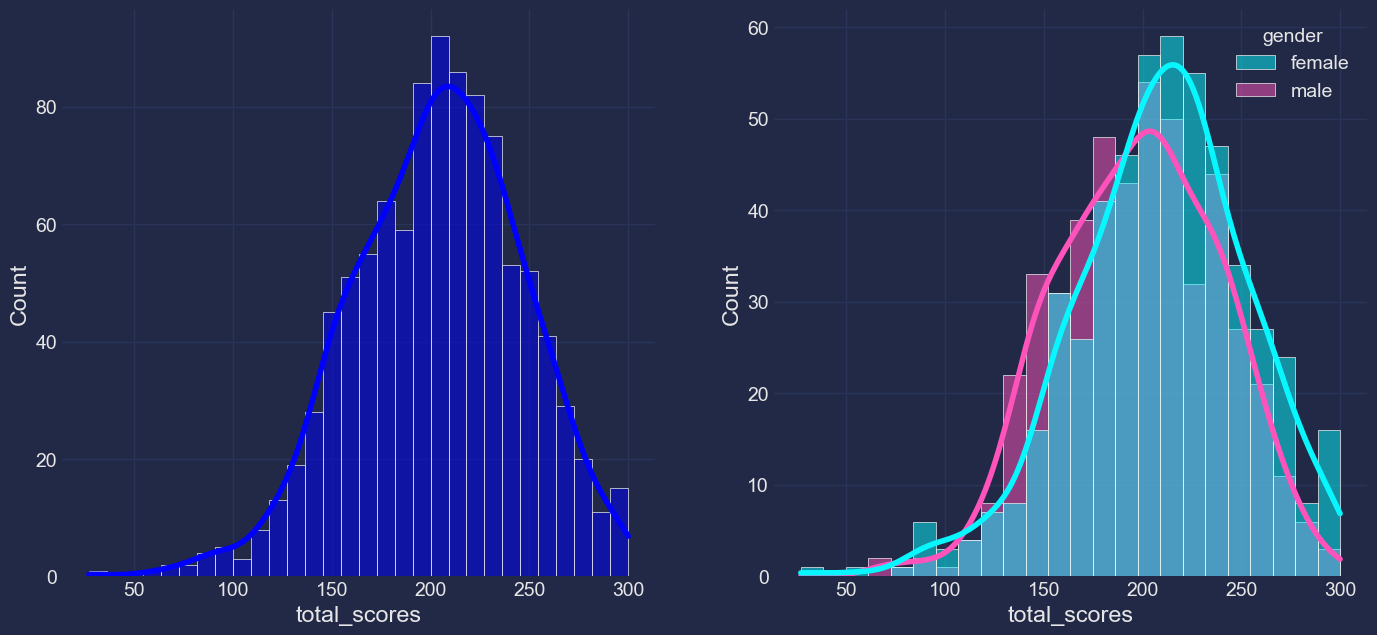

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_scores', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data = df, x = 'total_scores', kde=True, hue='gender')
plt.show()

Insight:
* Women students tend to perform well than male students

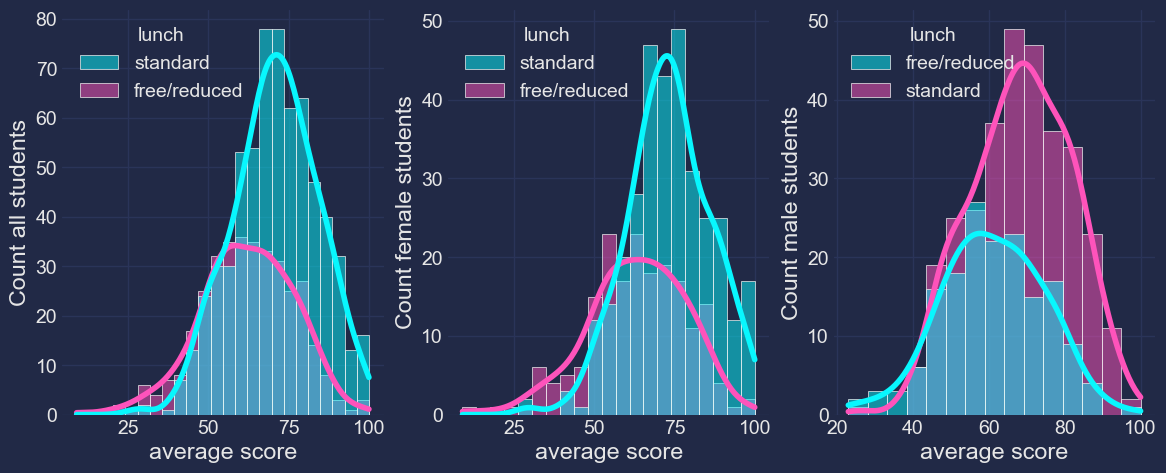

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde=True, hue='lunch')
plt.ylabel("Count all students")
plt.xlabel("average score")
plt.subplot(142)
sns.histplot(data = df[df.gender=='female'], x = 'average', kde=True, hue='lunch')
plt.ylabel("Count female students")
plt.xlabel("average score")
plt.subplot(143)
sns.histplot(data = df[df.gender=='male'], x = 'average', kde=True, hue='lunch')
plt.ylabel("Count male students")
plt.xlabel("average score")
plt.show()

Insight:
* Students that have lunch standard tend to perform better in exams

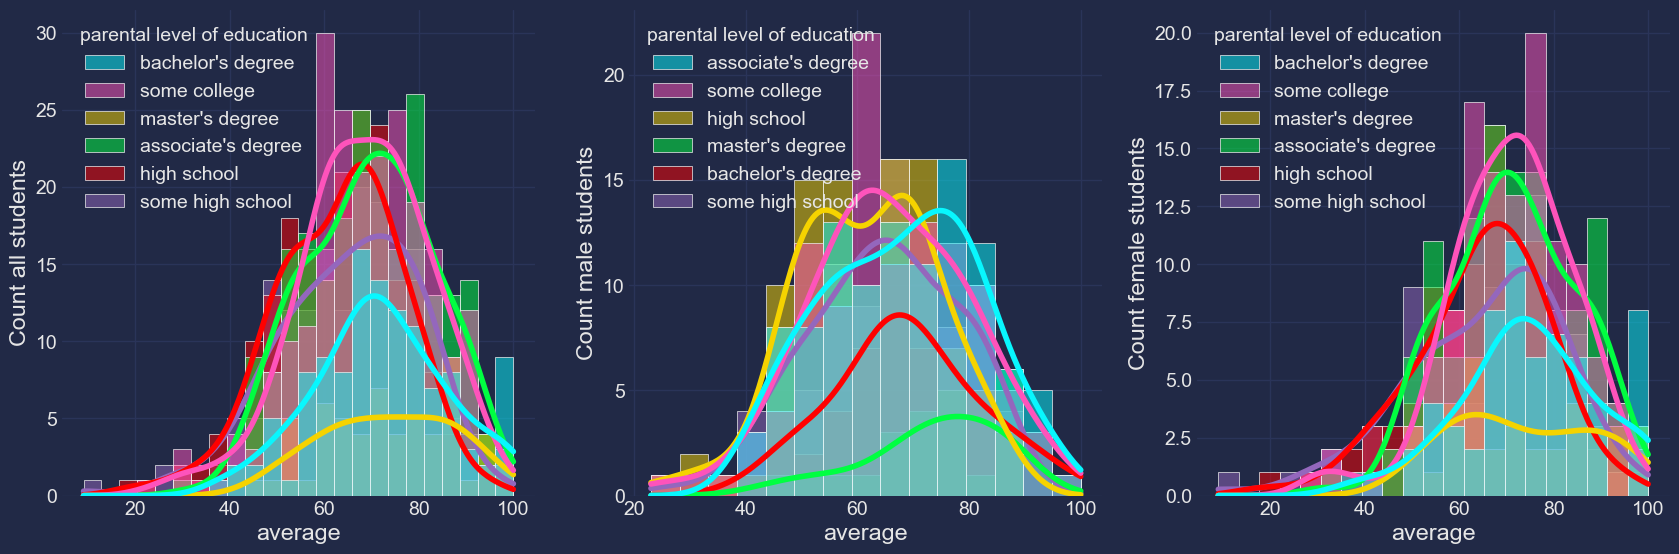

In [78]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.ylabel("Count all students")
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.ylabel("Count male students")
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.ylabel("Count female students")
plt.show()

Insights:

* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.
* 3rd plot shows that the female students are daughters of professional parents.


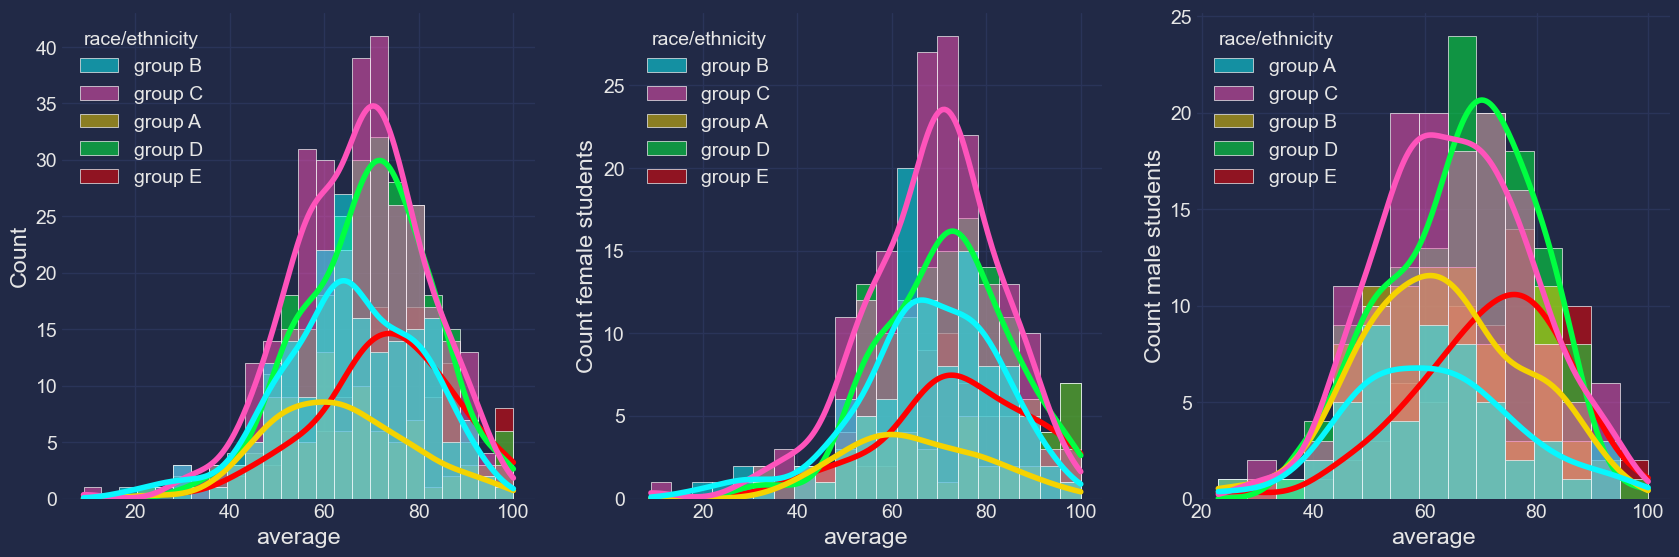

In [79]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.ylabel("Count female students")
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.ylabel("Count male students")
plt.show()


Insights:
* 2nd plot shows that there are more female students of group B, D and C than other groups.
* 2nd plot shows that there are more female students in group C than other groups.
* 3rd plot shows that there are more male students in group D than other groups.
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


### *<font color="Green">4.2. Visualize maximun score of students in all three subjects</font>*

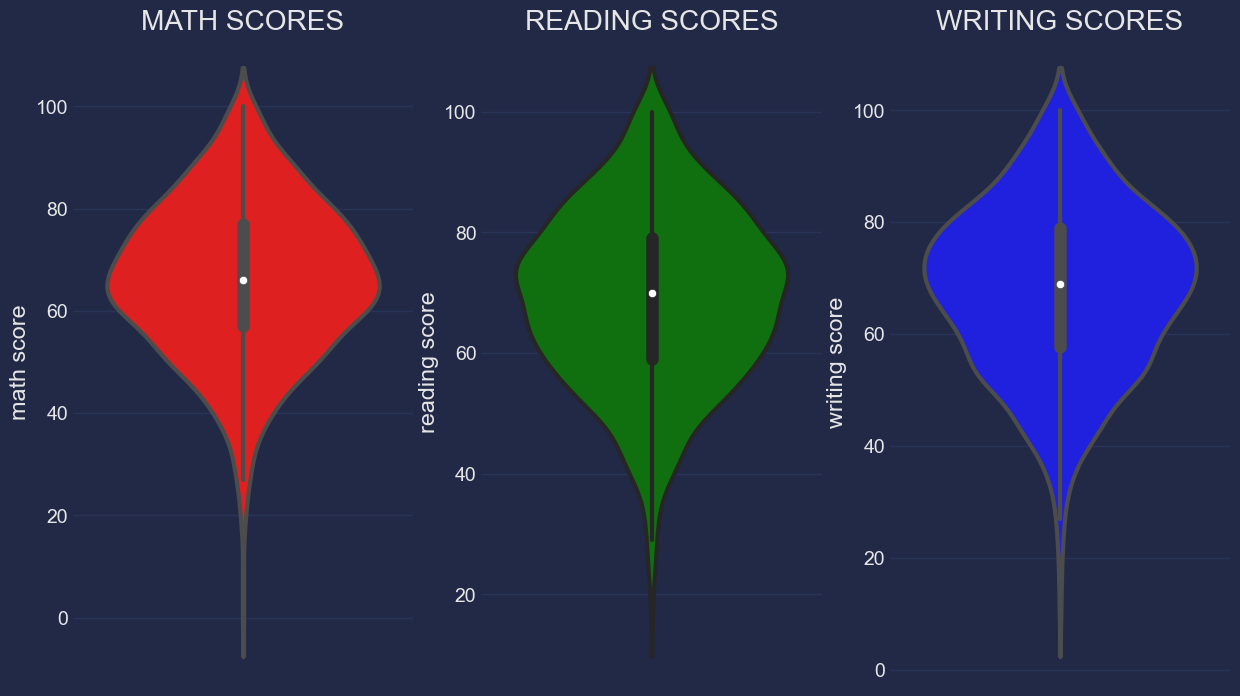

In [80]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insight:

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


### *<font color="Green">4.3. Multivariate analysis using pieplot</font>*

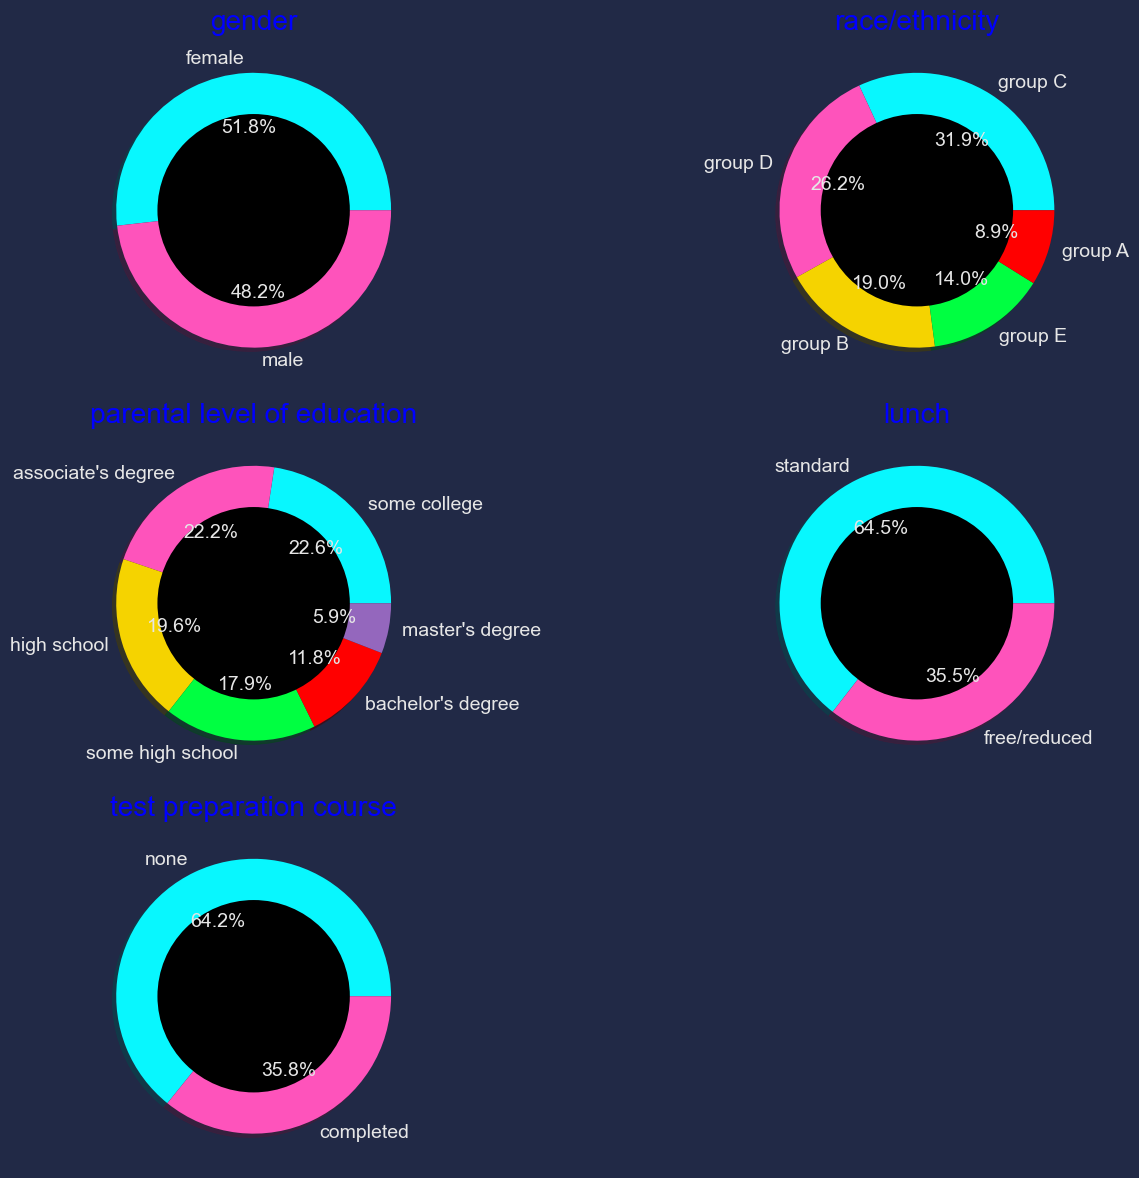

In [81]:
cat_vars = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15,12))

for i, var in enumerate(cat_vars):
    plt.subplot(3, 2, i+1)
    df[var].value_counts().plot(kind='pie',autopct='%.1f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.70,fc='black')
    plt.ylabel("")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var,color="blue")

plt.tight_layout()
plt.show()


Insights

* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"



### *<font color="Green">4.4. Features wise Visualization</font>*

#### *<font color="Green">4.4.1. Gender Column</font>*


* How is distribution of Gender ?
* Is gender has any impact on student's performance ?


#### *<font color="Green">Univariate analysis - How is distribution of gender?</font>*

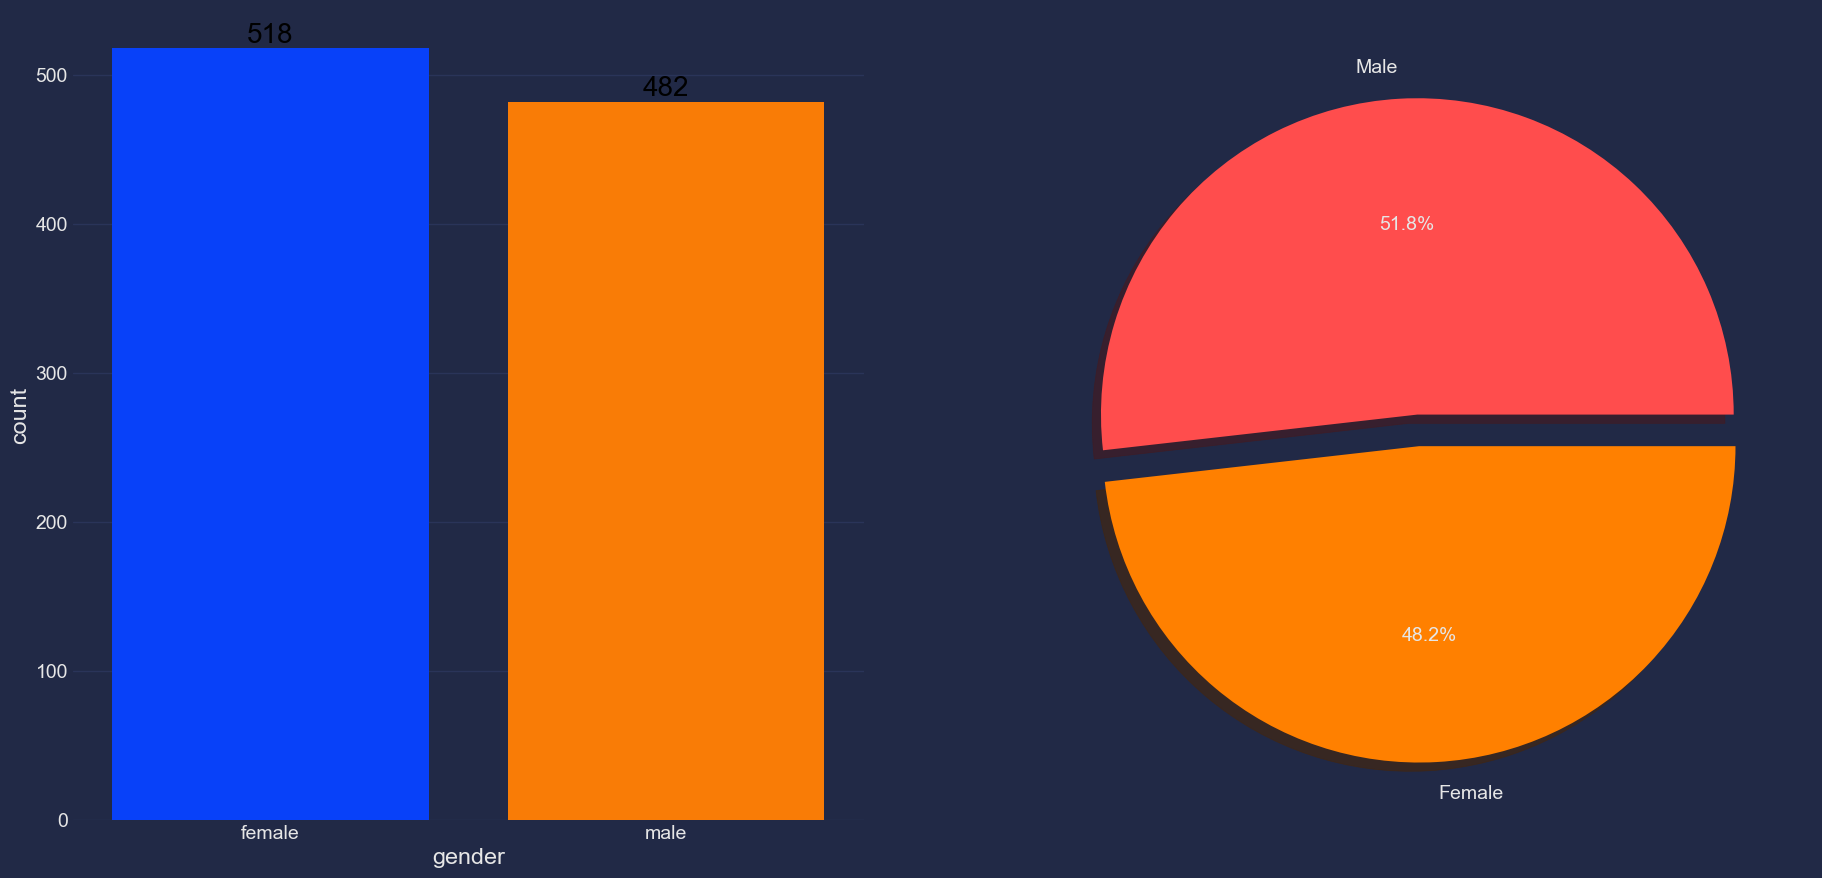

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['gender'],palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


Insights

* Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)


#### *<font color="Green">Bivariate analysis - Is gender has any impact on student's performance?</font>*

In [83]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_scores,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


* Female students tend to better than male students in reading and writing subjects. 
However, male students a litttle more better in math subject.

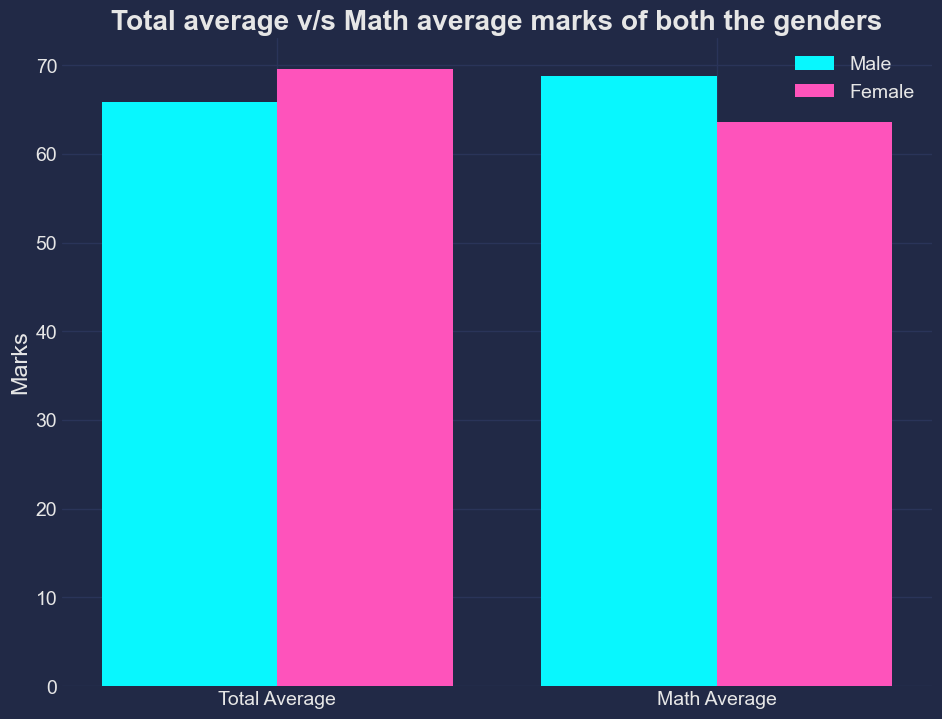

In [84]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

# Obtain the gender score for each one for math course
female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights:
* On average, females have better overall scores than males
* Whereas males students have higher scores in maths

### <font color="Green">4.4.2. Race - Ethnicity Column</font>

#### *<font color="Green">Univariate Analysis - How is group wise distribution?</font>*

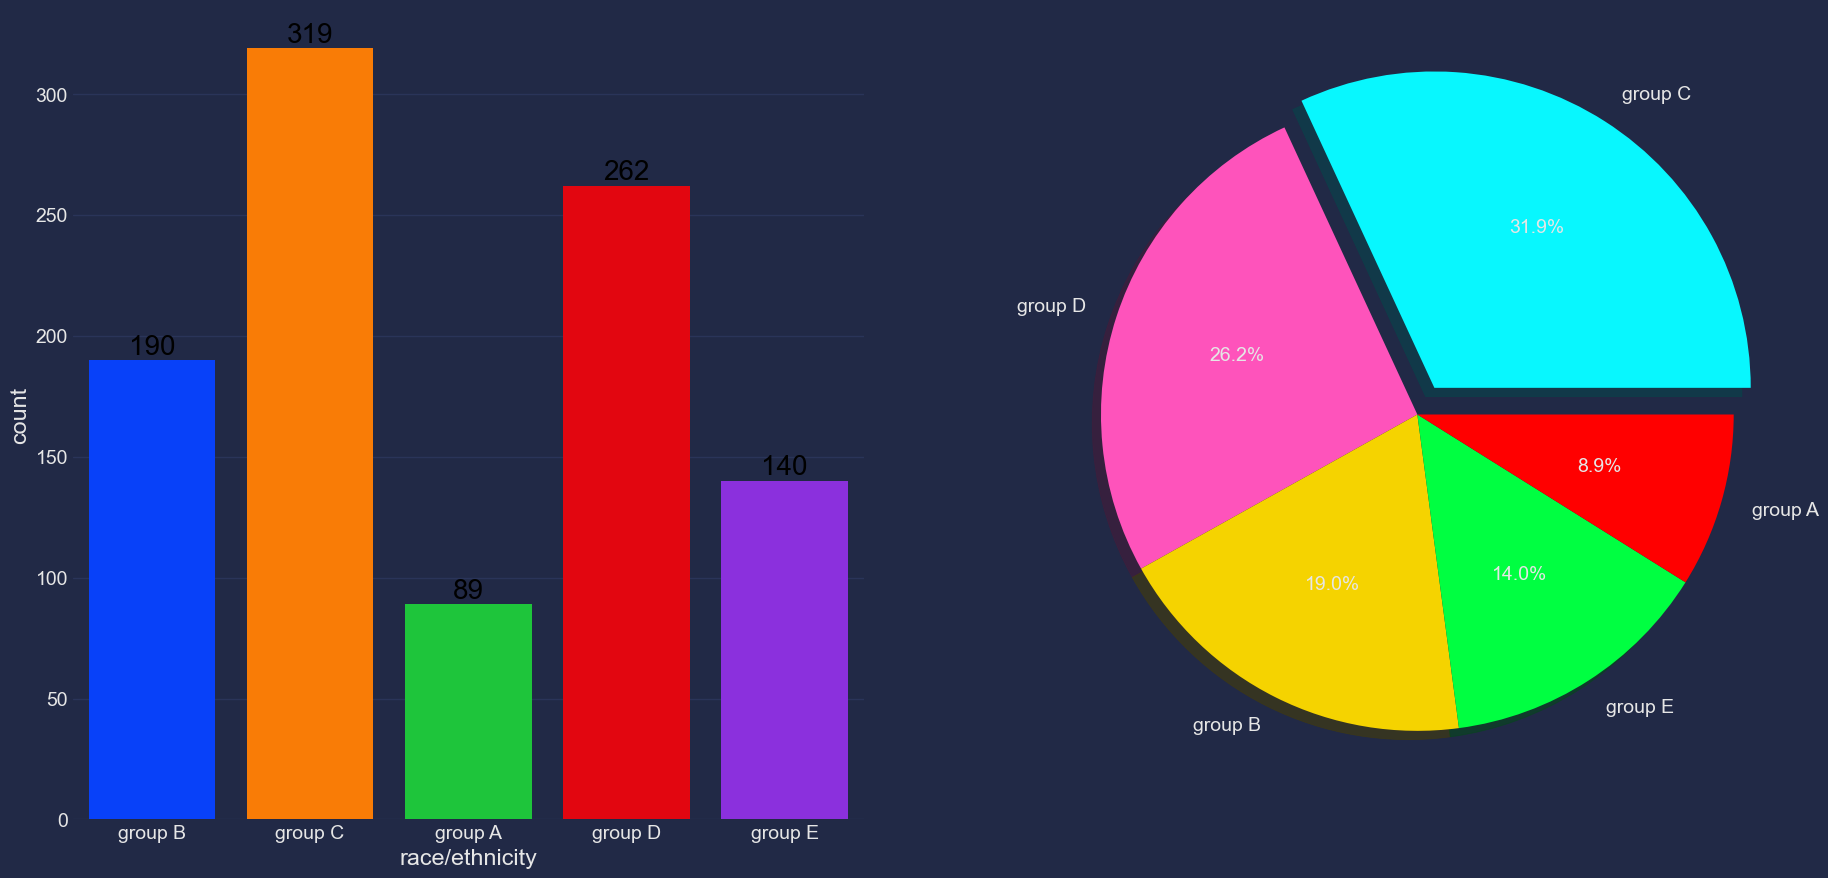

In [85]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Insights:
* Most of the students belonging from group C / group D
* Lowest number of students belong to group A.

#### *<font color="Green">Bivariate analysis - Is Race/Ehnicity has any impact on student's performance ? )</font>*

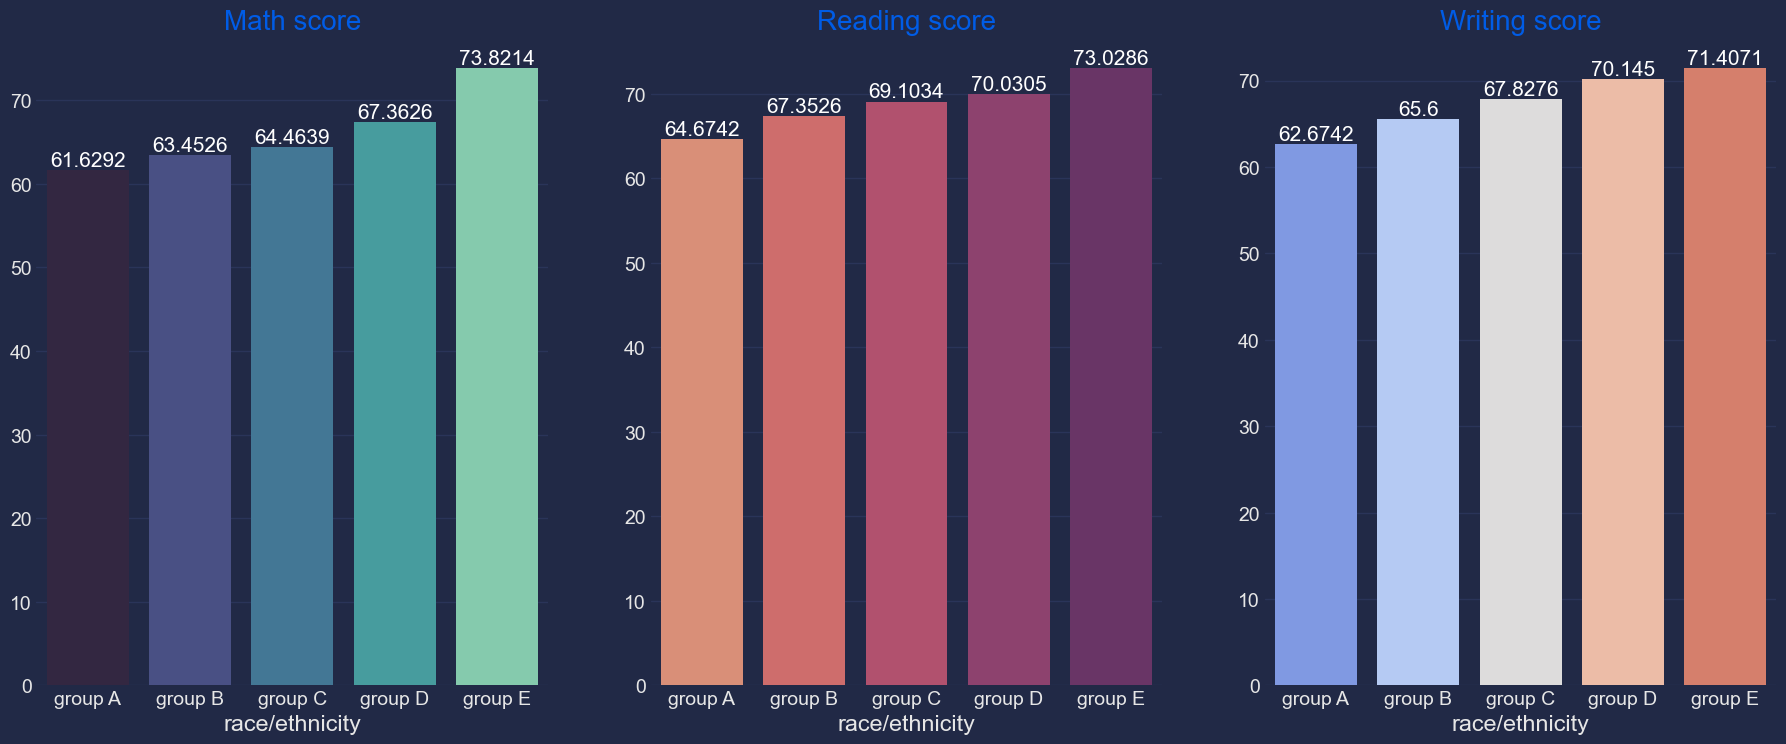

In [86]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='white',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='white',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='white',size=15)

Insights:
* Group E students have scores the highest marks.
* Group A students have scores the lowest marks.
* Students from a lower socioeconomic status have a lower average in all course subjects

### <font color="Green">4.4.3. Parental Level of Education</font>

#### *<font color="Green">Univariate analysis - What is educational background of student's parent? )</font>*

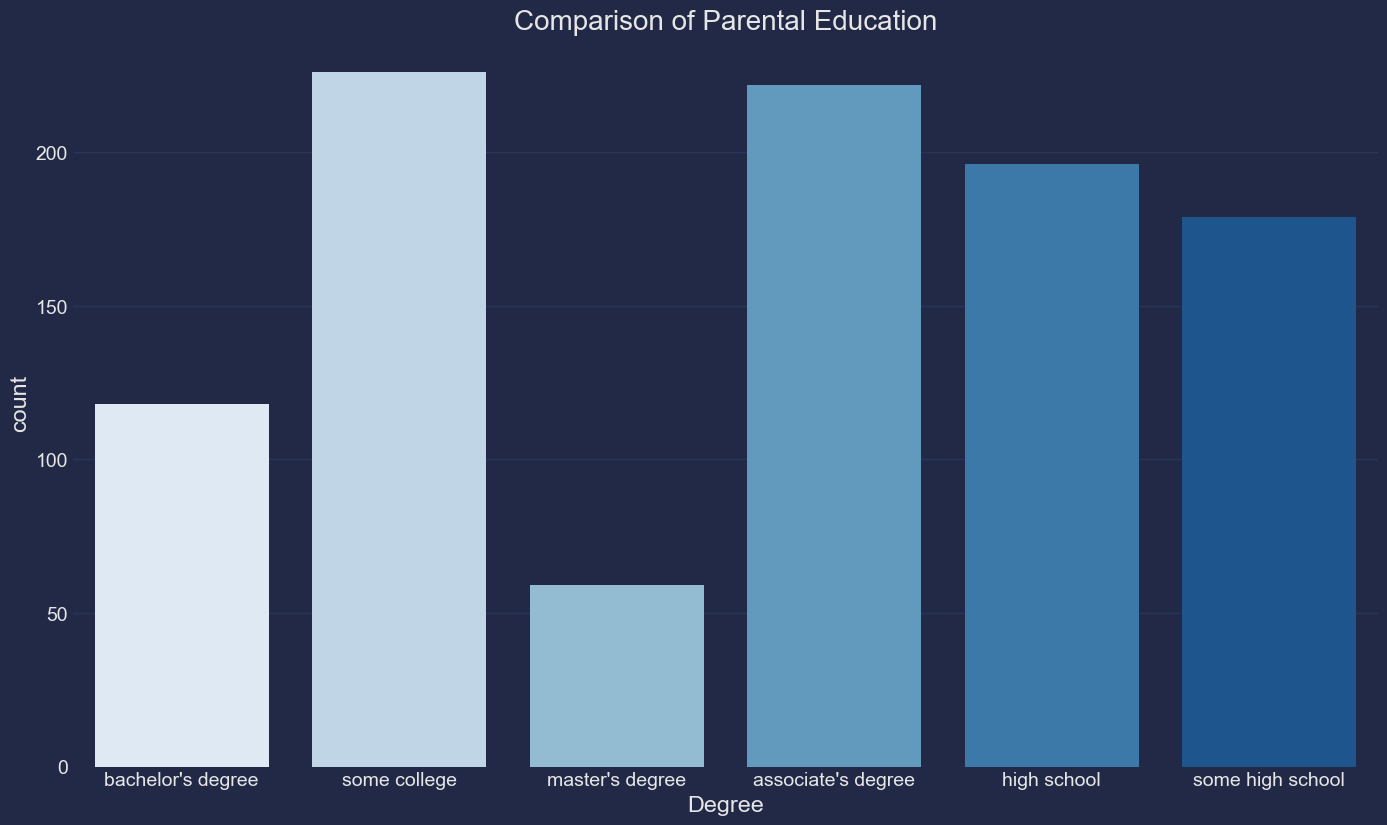

In [87]:
plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('fivethirtyeight')
#sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
sns.countplot(x=df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insight:
* Most of parents are from some college followed by associate's degree
* There are few parents with master's degree

#### *<font color="Green">Bivariate analysis - Is parental education has any impact on student's performance?</font>*

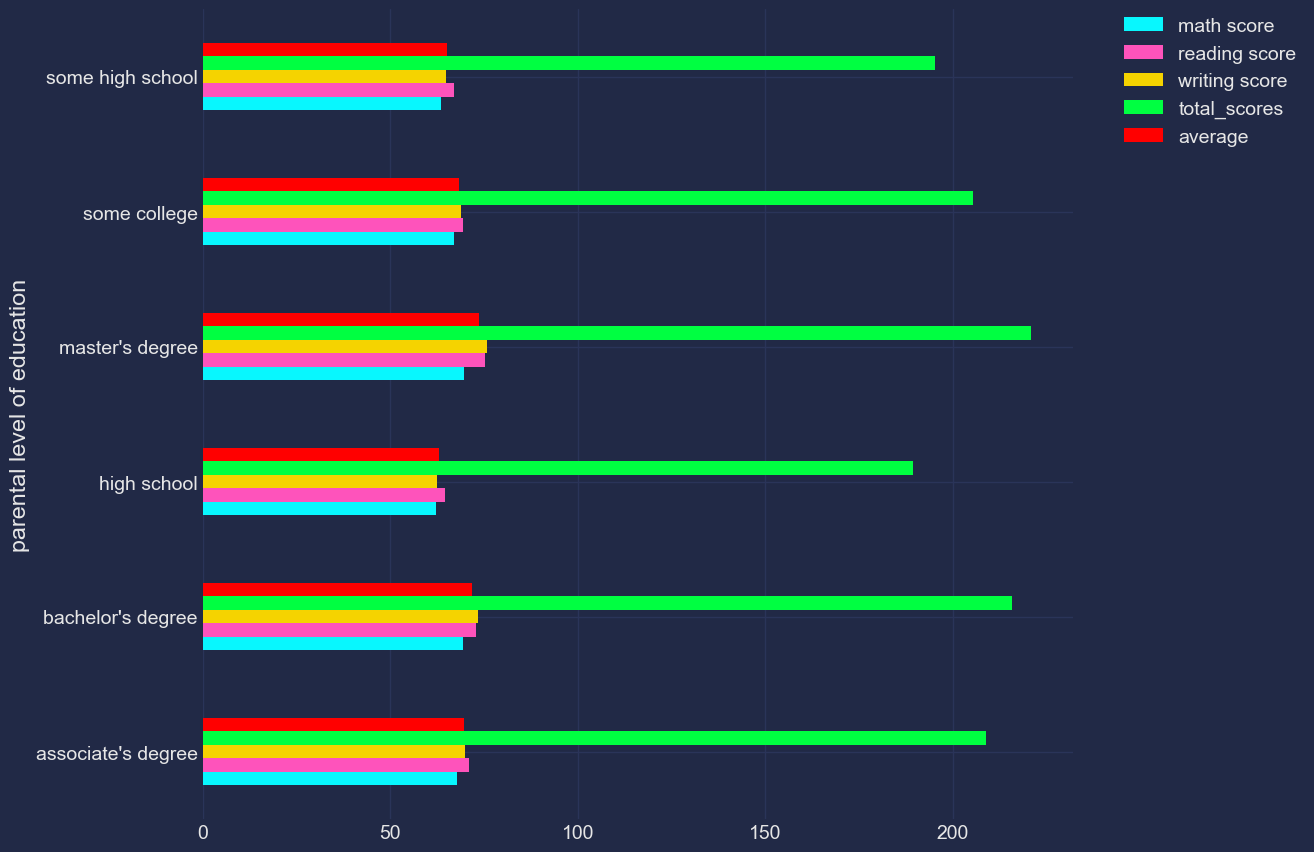

In [89]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insight:
* Students that have professional parents have performed a litle better than other students

### <font color="Green">4.4.4. Lunch Column</font>

#### *<font color="Green">Univariate analysis - Which type of lunch is most common amoung students?</font>*

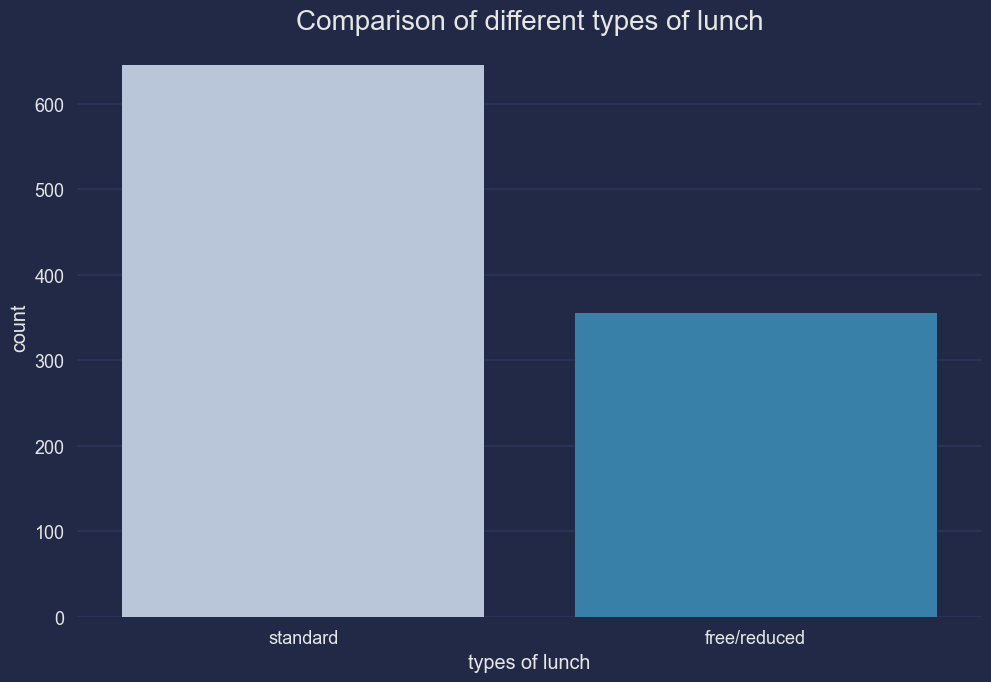

In [91]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insight:
* Students had Standard lunch was more than free lunch

#### *<font color="Green">Bivariate analysis - Is lunch type intake has any impact on student's performance ?</font>*

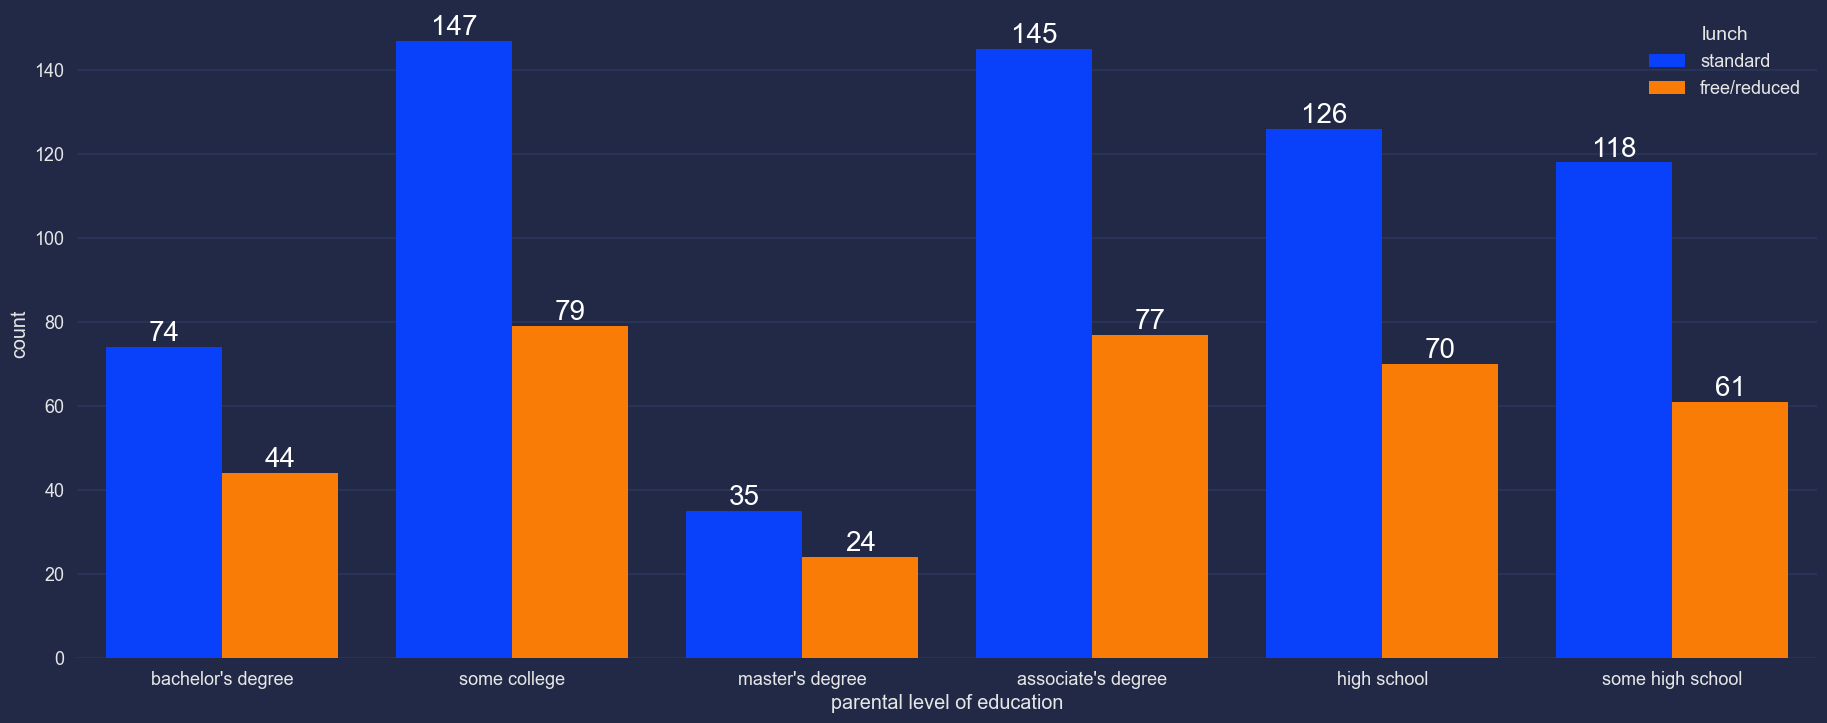

In [106]:
f,ax=plt.subplots(figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax)
for container in ax.containers:
    ax.bar_label(container,color='white',size=20)

* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### <font color="Green">4.4.5. Test Preparation Course Column</font>

#### *<font color="Green">Bivariate analysis - Is Test prepration course has any impact on student's performance?</font>*

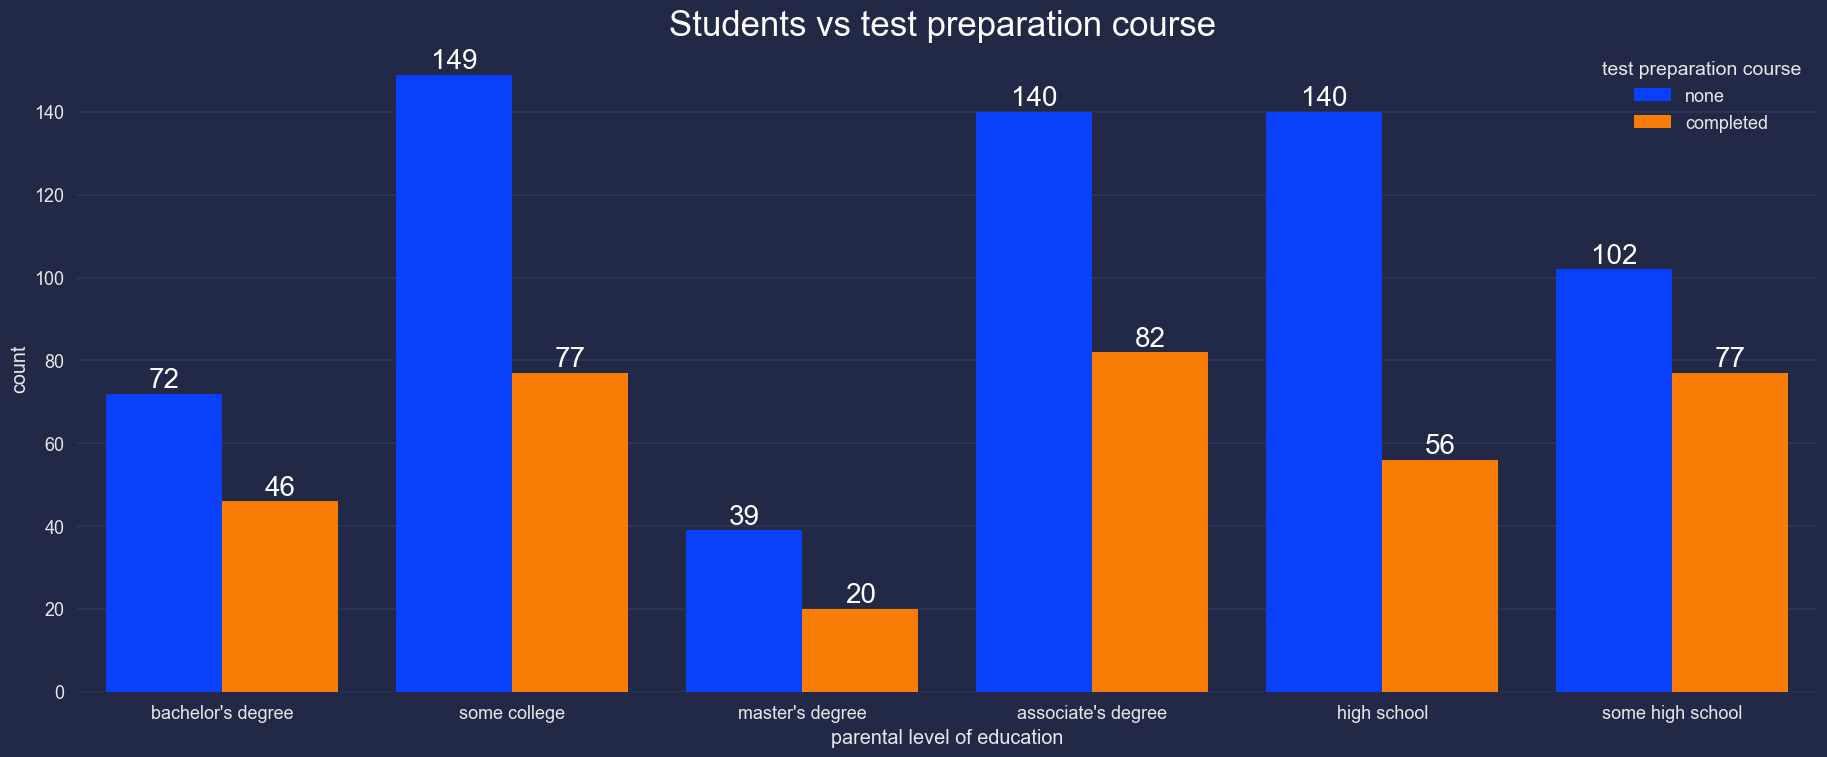

In [105]:
f,ax=plt.subplots(figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax)
ax.set_title('Students vs test preparation course ',color='white',size=25)
for container in ax.containers:
    ax.bar_label(container,color='white',size=20)

<Axes: xlabel='lunch', ylabel='writing score'>

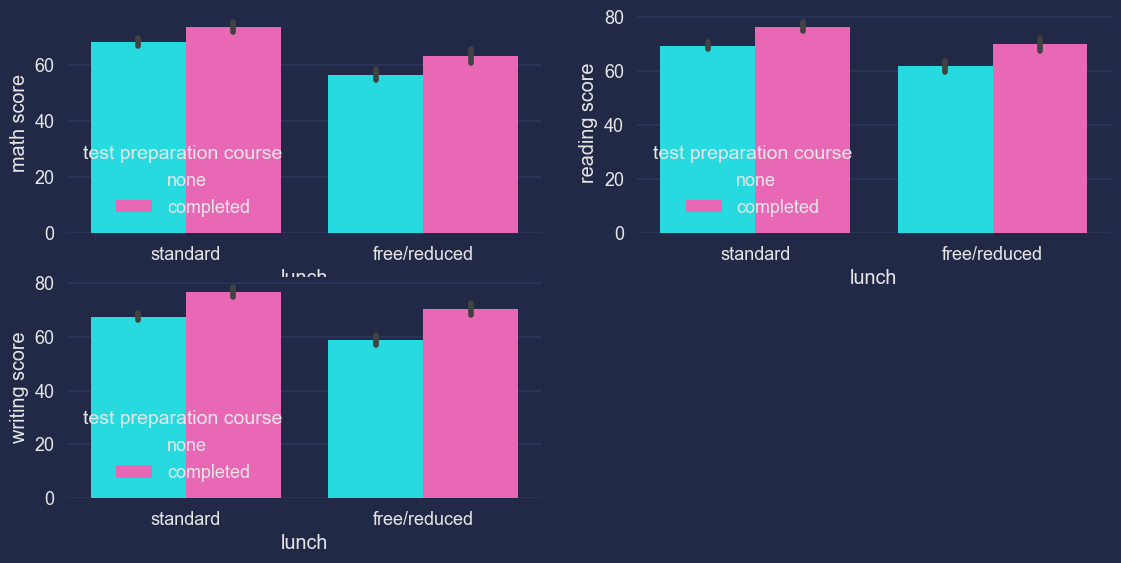

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])


Insights

* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course



### <font color="Green">4.4.6. Checking Outliers</font>

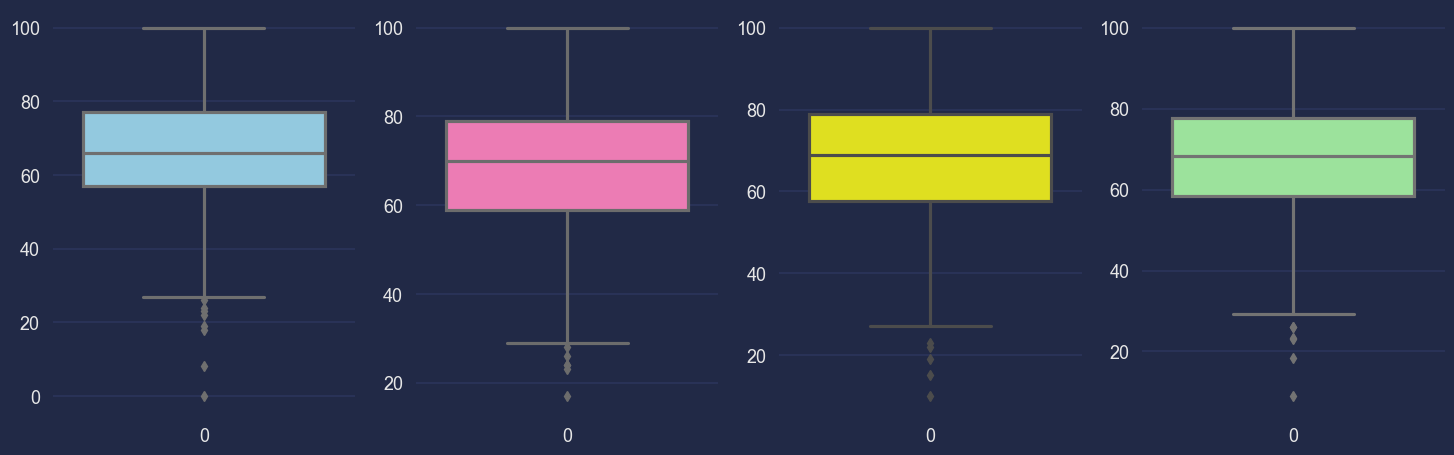

In [107]:
plt.subplots(1,4,figsize=(16,5)) # 1 row x 4 columns
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### <font color="Green">4.4.7. Multivariate Analysis Using Pairplot</font>

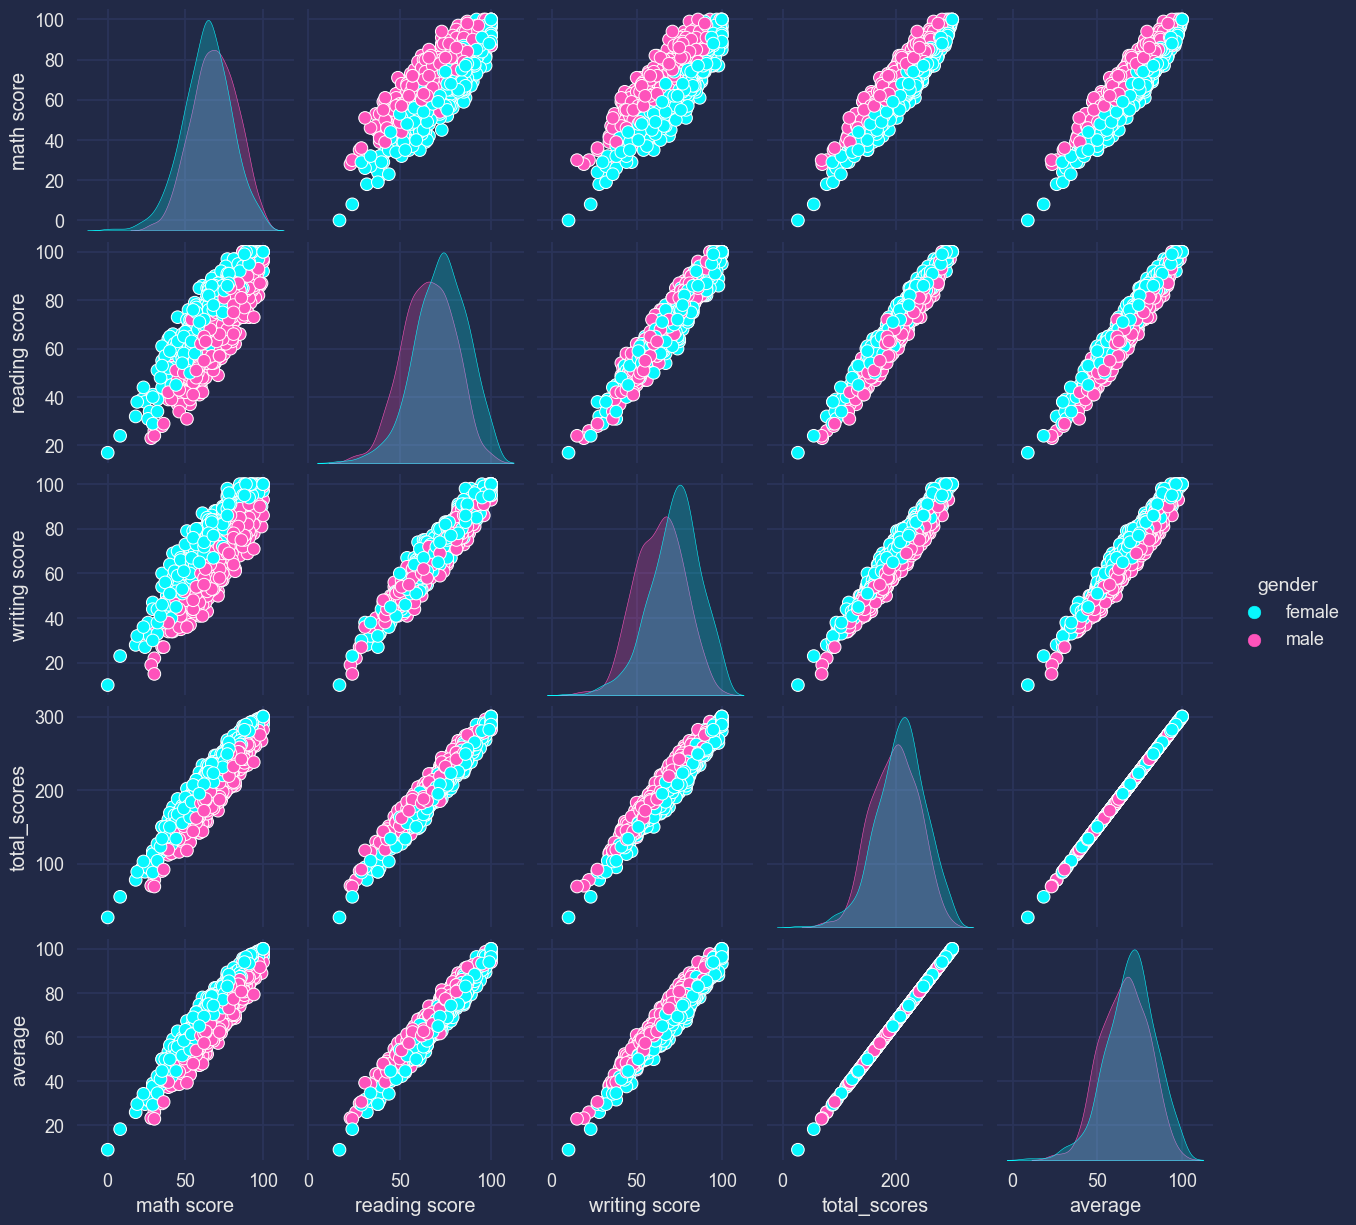

In [109]:
sns.pairplot(df,hue = 'gender')
plt.show()

* From the above plot, it is clear that all the scores increase linearly with each other

Conclusions

    Student's Performance is related with lunch, race, parental level education
    Females lead in pass percentage and also are top-scorers
    Student's Performance is not much related with test preparation course
    Finishing preparation course is benefitial.